# Определение перспективного тарифа для телеком компании

Провести предварительный анализ тарифов на небольшой выборке клиентов (данные 500 пользователей сотовой сети «Мегалайн»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год). Необхлдимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

##### 1. Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено:
   - 500 минут разговора
   - 50 сообщений
   - 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
   - минута разговора: 3 рубля
   - сообщение: 3 рубля
   - 1 Гб интернет-трафика: 200 рублей
   
##### 2. Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено:
   - 3000 минут разговора
   - 1000 сообщений
   - 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
   - минута разговора: 1 рубль
   - сообщение: 1 рубль
   - 1 Гб интернет-трафика: 150 рублей

__NB:__ значения минут и мегабайтов всегда округляются вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### План

1. Изучение общей информации о данных


2. Подготовка данных
 - Приведение данных к нужным типам
 - Поиск и исправление ошибок в данных
 - Подсчет для каждого пользователя:
    - количества сделанных звонков и израсходованных минут разговора по месяцам
    - количества отправленных сообщений по месяцам
    - объем израсходованного интернет-трафика по месяцам
    - помесячную выручку с каждого пользователя


3. Анализ данных
 - Описание поведения клиентов оператора, исходя из выборки (количество минут разговора, сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц) 
 - Подсчет среднего количества, дисперсии и стандартного отклонения
 - Построение гистограммы
 - Описание распределения


4. Проверка гипотез:
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов


5. Общий вывод

### Описание данных

Таблица ___users___ (информация о пользователях):
- *user_id* — уникальный идентификатор пользователя
- *first_name* — имя пользователя
- *last_name* — фамилия пользователя
- *age* — возраст пользователя (годы)
- *reg_date* — дата подключения тарифа (день, месяц, год)
- *churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- *city* — город проживания пользователя
- *tariff* — название тарифного плана

Таблица ___calls___ (информация о звонках):
- *id* — уникальный номер звонка
- *call_date* — дата звонка
- *duration* — длительность звонка в минутах
- *user_id* — идентификатор пользователя, сделавшего звонок

Таблица ___messages___ (информация о сообщениях):
- *id* — уникальный номер сообщения
- *message_date* — дата сообщения
- *user_id* — идентификатор пользователя, отправившего сообщение

Таблица ___internet___ (информация об интернет-сессиях):
- *id* — уникальный номер сессии
- *mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах)
- *session_date* — дата интернет-сессии
- *user_id* — идентификатор пользователя

Таблица ___tariffs___ (информация о тарифах):
- *tariff_name* — название тарифа
- *rub_monthly_fee* — ежемесячная абонентская плата в рублях
- *minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату
- *messages_included* — количество сообщений в месяц, включённых в абонентскую плату
- *mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- *rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- *rub_per_message* — стоимость отправки сообщения сверх тарифного пакета
- *rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

#### Путь к файлам

- /datasets/calls.csv
- /datasets/internet.csv
- /datasets/messages.csv
- /datasets/tariffs.csv
- /datasets/users.csv

## 1. Изучение общей информации о данных

In [1]:
# импортируем библиотеки
import pandas as pd               # pandas
import numpy as np                # numpy
import matplotlib.pyplot as plt   # matplotlib 
import seaborn as sns             # seaborn
sns.set()

import scipy.stats

In [2]:
# открываем файлы
calls = pd.read_csv('/datasets/calls.csv')          # звонки
internet = pd.read_csv('/datasets/internet.csv')    # интернет-сессии
messages = pd.read_csv('/datasets/messages.csv')    # сообщения
tariffs = pd.read_csv('/datasets/tariffs.csv')      # тарифы
users = pd.read_csv('/datasets/users.csv')          # пользователи

*Общая информация о звонках и первые 5 строк набора данных:*

In [3]:
# получаем информацию о звонках
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls['duration'].max()

38.0

Проверим нулевые значения столбца calls. Для этого возьмем отрезок от 18 секунд (0.3 минуты) до 0. Выдвинем гипотезу, что 0 звонки - это не ошибка, а сброшенные вызовы, либо неудачные попытки дозвона.

In [5]:
calls[(calls['duration'] < 0.3) & (calls['duration'] > 0)].head()

,id,call_date,duration,user_id
122,1000_122,2018-10-07,0.13,1000
135,1000_135,2018-10-25,0.02,1000
275,1000_275,2018-07-07,0.14,1000
334,1000_334,2018-12-03,0.09,1000
453,1001_85,2018-12-12,0.01,1001


Так как значения меньше 0.3 минуты существуют, также присутствуют значения в сотые доли минут (0,01 минуты - 0,6 секунды), можно сделать вывод, что гипотеза подтвердилась.

*Общая информация об интернет-сессиях и первые 5 строк набора данных:*

In [6]:
# получаем информацию об интернет-сессиях
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


*Общая информация о сообщениях и первые 5 строк набора данных:*

In [7]:
# получаем информацию о сообщениях
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


*Общая информация о тарифах и вывод набора данных на экран:*

In [8]:
# получаем информацию о тарифах
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


*Общая информация о пользователях и первые 5 строк набора данных:*

In [9]:
# получаем информацию о пользователях
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Для последующих подсчетов заменим пропуски в дате окончания контракта на 31 декабря 2018г.

In [10]:
users['churn_date'].fillna('2018-12-31', inplace=True)

#### Выводы

Изучена первая информация о данных. В целом, данные предоставлены полные, без пропусков, кроме набора данных с __информацией о пользователях__.

1. calls - пропуски в данных отсутствуют, типы данных в столбцах call_date и duration не соответствуют представленным данным: 
  - столбец call_date - показывает дату совершения звонка. однако тип данных - object. Необходим перевод в формат даты
  - duration - данные записаны в виде дробных чисел, однако, по условиям тарификации, минута округляется до целого в большую сторону. Необходима замена типа данных на целочисленный.
  
  Также присутствуют нулевые значения продолжительности разговора. С учетом того, что в данных находятся также и значения от 0 до 1 минуты, стоит предположить, что 0 - это несостоявшийся звонок (пропущенный входящий, либо отклоненный исходящий). При анализе нулевые звонки не учитывать 
  
  
2. internet - попусков в данных нет. Типы данных в столбцах mb_used и session_date не соответствуют представленным данным:
  - столбец session_date - показывает дату совершения звонка. однако тип данных - object. Необходим перевод в формат даты
  - mb_used - данные записаны в виде дробных чисел, однако, по условиям тарификации, значения использованных данных округляются до целого в большую сторону. Необходима замена типа данных на целочисленный.
  
  Присутствуют нулевые значения в mb_used. Раз сеанс передачи данных записан, значит он имел место быть. Стоит предположить, что таким образом записываются сессии короче 0.01 мбайта. Такие нулевые значения подлежат замене на значение 1, в соответствии с условиями тарификации.


3. messages - данные без пропусков. Столбец message_date требует замены типа данных на формат даты


4. tariffs - данные без пропусков. Стоимость указана за гигабайт, тогда как траффик отображается в мегабайтах. Данное отличие не критично, исправления не требует. Учтем при расчетах


5. users - пропуски в churn_date. Обусловлены тем, что люди все еще является абонентами Мегалайна. У тех, кто отключился - данные заполнены. reg_date и churn_date требуют замены типа данных на на формат даты. Для последующих подсчетов заменим пропуски в дате окончания контракта на 31 декабря 2018г.



## 2. Подготовка данных

### Приведение данных к нужным типам

Требуют замены следующие столбцы в следующих датасетах:


 - calls:
   - call_date - показывает дату совершения звонка. Однако тип данных - object. Необходим перевод в формат даты
   - duration - данные записаны в виде дробных чисел, однако, по условиям тарификации, минута округляется до целого в большую сторону. Необходима замена типа данных на целочисленный.
   
   
 - internet:
   - session_date - показывает дату совершения звонка. Однако тип данных - object. Необходим перевод в формат даты
   - mb_used - данные записаны в виде дробных чисел, однако, по условиям тарификации, значения использованных данных округляются до целого в большую сторону. Необходима замена типа данных на целочисленный.


 - messages:
   - message_date требует замены типа данных на формат даты


 - users:
   - reg_date требует замены типа данных на формат даты
   - churn_date требует замены типа данных на формат даты

In [11]:
# функция замены типа данных в столбцах: 
    # data - датасет
    # column_name - названия столбцов
    # final_type - тип данных, на который необходимо поменять текущий тип
        # DT - обозначение формата даты
    # ceil - необходимо ли округление в большую сторону
        # 'yes' - необходима
        # 'no' / 'любой текст' - нет
    
def change_mean_type(data, column_name, final_type, ceil):
    
    #меняем тип данных, ошибки игнорируем (оставляем оригинальные значения - если значения в столбце не числовые)
    if final_type == 'int':
        
        # переменная для сохранения текущего типа данных
        temp_check_dtype = data[column_name].dtype
        
        if ceil == 'yes':
            # округляем значение вверх (согласно условиям тарификации)
            data[column_name] = np.ceil(data[column_name])
            
        else:
            data[column_name] = data[column_name]
        
        # меняем тип данных
        data[column_name] = data[column_name].astype(final_type, errors='ignore')
        
    elif final_type == 'DT':
        # переменная для сохранения текущего типа данных
        temp_check_dtype = data[column_name].dtype
        
        data[column_name] = pd.to_datetime(data[column_name])
    
    # если указанного формата нет в функции (можно добавить)
    else:
        print('Check your function. Wrong dtype')
        
    print()
    print('Проверка замены типа данных в столбце', column_name)
    print('Исходный тип данных:', temp_check_dtype)
    print('Полученный тип данных:', data[column_name].dtype)
    print()

<font color='green'>Интересный подход.

In [12]:
# меняем типы данных в звонках
change_mean_type(calls, 'duration', 'int', 'yes')
change_mean_type(calls, 'call_date', 'DT', 'no')

# меняем типы данных в наборе интернет
change_mean_type(internet, 'mb_used', 'int', 'yes')
change_mean_type(internet, 'session_date', 'DT', 'no')

# меняем типы данных в сообщениях
change_mean_type(messages, 'message_date', 'DT', 'no')

# меняем типы данных в наборе пользователей
change_mean_type(users, 'reg_date', 'DT', 'no')
change_mean_type(users, 'churn_date', 'DT', 'no')


Проверка замены типа данных в столбце duration
Исходный тип данных: float64
Полученный тип данных: int64


Проверка замены типа данных в столбце call_date
Исходный тип данных: object
Полученный тип данных: datetime64[ns]


Проверка замены типа данных в столбце mb_used
Исходный тип данных: float64
Полученный тип данных: int64


Проверка замены типа данных в столбце session_date
Исходный тип данных: object
Полученный тип данных: datetime64[ns]


Проверка замены типа данных в столбце message_date
Исходный тип данных: object
Полученный тип данных: datetime64[ns]


Проверка замены типа данных в столбце reg_date
Исходный тип данных: object
Полученный тип данных: datetime64[ns]


Проверка замены типа данных в столбце churn_date
Исходный тип данных: object
Полученный тип данных: datetime64[ns]



#### Выводы

Требовали замены типа данных с числа с плавающей точкой на целочисленный следующие столбцы в следующих датасетах:
- calls: duration
- internet: mb_used

Здесь для замены была написана функция, включающая в себя метод замены типов данных ___.astype()___.

Замена типа данных с  object на datetime была проведена:
- calls: call_date
- internet: session_date
- messages: message_date
- users: reg_date, churn_date

Замена была проведена методом ___.to_datetime()___.

### Поиск и исправление ошибок в данных

Проверим нулевые значения столбца duration набора данных calls. Выдвинуто предположение, что 0 в продолжительности - это неудавшийся исходящий звонок. Основываясь на проверке из прошлого раздела, сделаем еще одну проверку: если 0 присутствует у одного и того же пользователя, значит это не ошибка биллинга системы, а действительно неудавшийся исходящий.

Возьмем пользователя с ID 1000. Проверяем положительные значения длины разговора.

In [13]:
calls[(calls['user_id'] == 1000) & (calls['duration'] > 0)].head(3)

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Проверяем нулевые значения:

In [14]:
calls[(calls['user_id'] == 1000) & (calls['duration'] == 0)].head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
5,1000_5,2018-11-02,0,1000


Гипотеза подтвердилась.

Нулевые значения столбца mb_used датасета internet увеличим на 1. Считаем, что интернет-сессия отображается в статистике, если она действительно началась. Тогда нулевые значения означают очень маленький размер информации (например, пуш)

In [15]:
# замена 0 на 1
internet['mb_used'].replace(0, 1, inplace = True)

#### Вывод

Были обнаружены значения 0 в столбце __duration__ набора данных ___calls___. Скорее всего, это несостоявшиеся разговоры. Были проверены данные по длительности разговора меньше 0.5 минут и больше 0. Такие данные представлены без ошибок. Также для отдельно взятого абонента было проверено наличие звонков с __положительной__ продолжительностью и __нулевой__. Для такого абонента существуют записи и с нулевой и положительной длительностью разговора. Отсюда можно сделать вывод, что наличие нулей не является ошибкой выгрузки данных, но  показывает несостоявшиеся исходящие - собеседник не взял трубку, было занято и т.п.


Нулевые значения столбца __mb_used__ датасета ___internet___ заменяем значением 1. В соответствии с условиями тарифов, любая интернет-сессия округляется в большую сторону. То, что имеется запись о сессии, количество переданных данных в которой равно 0, скорее всего говорит, что сессия была, но данных было передано очень мало. Условия тарификации предполагают округление в большую сторону до мегабайта, поэтому заменили 0 на 1 методом ___.replace()___.


Полученные данные по количеству минут в наборе звонков и потраченных мегабайт в наборе интернета были представлены в виде десятичных дробей (тип данных float). В предыдущем разделе была проведена замена типа данных на целочисленный (integer). Перед этим данные были округлены в большую сторону до мегабайта методом ___.ceil()___ библиотеки __numpy__.


Датасет __users__ содержит пропущенные данные в столбце ___churn_date___, так как этот столбец показывает дату окончания договора, соответственно, абоненты с пропусками еще имеют действующий договор с оператором. Для последующих подсчетов заменили пропуски в дате окончания контракта на 31 декабря 2018г.

### Подсчет для каждого пользователя

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

Запишем функцию для формирования сводной таблицы

In [16]:
# функция создания сводной таблицы по месяцам для каждого пользователя
    # data - датафрейм
    # duration_column - столбец с продолжительностями разговора, либо интернет сессии
        # для датафрейма messages указать любой текст
    # date_column - столбец с датой
    # name_of_df - название датафрейма в текстовом виде
    
def make_pivot_per_month_by_users(data, duration_column, date_column, name_of_df):
    
    # проверка на соответствие условию
    if (name_of_df == 'calls') | (name_of_df == 'internet'):
        
        # формирование сводной таблицы для calls и internet
        temp_pivot = data.pivot_table(index=[data[date_column].dt.month, 'user_id'],
                                                values=[duration_column, 'id'],
                                                aggfunc={'id': 'count',
                                                         duration_column: 'sum'})[[duration_column, 'id']]
        
        # условие для переименования столбцов в зависимости от датафрейма
        if name_of_df == 'calls':
            temp_pivot.columns = ['minutes_per_month', 'calls_per_month']
    
        elif name_of_df == 'internet':
            temp_pivot.columns = ['mb_per_month', 'sessions_per_month']
        
    elif name_of_df == 'messages':
        
        # формирование сводной таблицы для messages      
        temp_pivot = data.pivot_table(index=[data[date_column].dt.month, 'user_id'],
                                                values='id',
                                                aggfunc='count')
        
        
        # переименование столбца
        temp_pivot.columns = ['messages_per_month']
    
    # переименования индексов: месяц, user_id
    temp_pivot.index.names = ['month', 'user_id']
    
    return temp_pivot

Формируем сводную таблицу звонков

In [17]:
# сводная таблица для звонков
calls_and_minutes_per_month = make_pivot_per_month_by_users(calls, 
                                                            'duration', 
                                                            'call_date', 
                                                            'calls')
calls_and_minutes_per_month

minutes_per_month  calls_per_month
month user_id                                    
1     1005                    95               15
      1032                   380               61
      1045                     9                1
      1055                   551               64
      1071                   194               24
...                          ...              ...
12    1494                   418               62
      1495                  1031              155
      1496                   518               80
      1497                   545               71
      1499                   492               69

[3174 rows x 2 columns]

#### Количество отправленных сообщений по месяцам

In [18]:
# сводная таблица для сообщений
mes_per_month = make_pivot_per_month_by_users(messages, 
                                              'some_text', 
                                              'message_date', 
                                              'messages')
mes_per_month

messages_per_month
month user_id                    
1     1005                      7
      1032                     38
      1045                      5
      1055                     30
      1071                     16
...                           ...
12    1493                     78
      1495                     84
      1496                     51
      1497                     17
      1499                     66

[2717 rows x 1 columns]

#### Объем израсходованного интернет-трафика по месяцам

In [19]:
# сводная таблица для интернета
internet_per_month = make_pivot_per_month_by_users(internet,
                                                   'mb_used',
                                                   'session_date',
                                                   'internet')
internet_per_month

mb_per_month  sessions_per_month
month user_id                                  
1     1005             2730                   6
      1032            24158                  62
      1045             2348                   5
      1055            17115                  47
      1071            15625                  40
...                     ...                 ...
12    1494            17650                  49
      1495            23451                  47
      1496            20770                  68
      1497            19946                  47
      1499            13082                  45

[3203 rows x 2 columns]

#### Помесячная выручка с каждого пользователя

Объединяем данные из датафреймов количества звонков, интернета и сообщений по месяцам

In [20]:
statistics_merged = (
    calls_and_minutes_per_month.join([mes_per_month, internet_per_month], 
                                     how='left')
)

Заполняем пустые значения нулями. Пустые значения появились из-за того, что пользователь не пользовался данным видом услуг в данном месяце. Следовательно, замена на 0 оправдана.

In [21]:
statistics_merged.fillna(0, inplace=True)

Меняем типы данных в сводной таблице на целочисленные

In [22]:
for column_name in statistics_merged.columns:
    change_mean_type(statistics_merged, column_name, 'int', 'no')


Проверка замены типа данных в столбце minutes_per_month
Исходный тип данных: float64
Полученный тип данных: int64


Проверка замены типа данных в столбце calls_per_month
Исходный тип данных: float64
Полученный тип данных: int64


Проверка замены типа данных в столбце messages_per_month
Исходный тип данных: float64
Полученный тип данных: int64


Проверка замены типа данных в столбце mb_per_month
Исходный тип данных: float64
Полученный тип данных: int64


Проверка замены типа данных в столбце sessions_per_month
Исходный тип данных: float64
Полученный тип данных: int64



Подготавливаем таблицу со значениями тарифов к слиянию: назначаем индексом значение tariff_name. Переименовываем в tariff для соответствия конечному датафрейму

In [23]:
tariffs.set_index('tariff_name', inplace=True)   # назначем индекс
tariffs.index.name = 'tariff'                    # переименовываем

Склеиваем датафреймы пользователей и тарифов

In [24]:
users_with_tariffs = users.merge(tariffs, on='tariff')

users_with_tariffs.set_index('user_id', inplace=True)   # назначем индекс

Формируем конечную таблицу

In [25]:
statistics_merged = (
    statistics_merged.join(users_with_tariffs.loc[:, ['tariff', 'messages_included', 'mg_per_month_included', 
                                 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 
                                 'rub_per_message', 'rub_per_minute', 'city', 'reg_date',
                                                     'churn_date']], how='inner')
) 

In [26]:
statistics_merged

minutes_per_month  calls_per_month  messages_per_month  \
month user_id                                                           
1     1005                    95               15                   7   
      1032                   380               61                  38   
      1045                     9                1                   5   
      1055                   551               64                  30   
      1071                   194               24                  16   
...                          ...              ...                 ...   
12    1494                   418               62                   0   
      1495                  1031              155                  84   
      1496                   518               80                  51   
      1497                   545               71                  17   
      1499                   492               69                  66   

               mb_per_month  sessions_per_month tariff  messages_included  \
month user_id                                                               
1     1005             2730                   6  smart                 50   
      1032            24158                  62  smart                 50   
      1045             2348                   5  smart                 50   
      1055            17115                  47  smart                 50   
      1071            15625                  40  smart                 50   
...                     ...                 ...    ...                ...   
12    1494            17650                  49  smart                 50   
      1495            23451                  47  ultra               1000   
      1496            20770                  68  smart                 50   
      1497            19946                  47  smart                 50   
      1499            13082                  45  smart                 50   

               mg_per_month_included  minutes_included  rub_monthly_fee  \
month user_id                                                             
1     1005                     15360               500              550   
      1032                     15360               500              550   
      1045                     15360               500              550   
      1055                     15360               500              550   
      1071                     15360               500              550   
...                              ...               ...              ...   
12    1494                     15360               500              550   
      1495                     30720              3000             1950   
      1496                     15360               500              550   
      1497                     15360               500              550   
      1499                     15360               500              550   

               rub_per_gb  rub_per_message  rub_per_minute              city  \
month user_id                                                                  
1     1005            200                3               3  Набережные Челны   
      1032            200                3               3         Ульяновск   
      1045            200                3               3          Улан-Удэ   
      1055            200                3               3            Казань   
      1071            200                3               3              Омск   
...                   ...              ...             ...               ...   
12    1494            200                3               3              Омск   
      1495            150                1               1           Иркутск   
      1496            200                3               3           Вологда   
      1497            200                3               3         Челябинск   
      1499            200                3               3             Пермь   

                reg_date churn_date  
month us

Считаем помесячную выручку для каждого пользователя по показателям (минуты, мегабайты, сообщения).

In [27]:
# функция для подсчета выручки по показателям 
    # indicator - показатель (minutes, message, internet)

def check_for_out_of_limit(indicator):
    
    # для минут
    if indicator == 'minutes':                                                  
        statistics_merged['check_out_of_limit'] = (
            statistics_merged['minutes_per_month'] - 
            statistics_merged['minutes_included']
        )
        
        # потрачено больше пакета
        rule_upper_0 = (statistics_merged['check_out_of_limit'] > 0)
                   
        statistics_merged.loc[rule_upper_0, 'amount_for_minutes'] = (
            statistics_merged[rule_upper_0]['check_out_of_limit'] *
            statistics_merged[rule_upper_0]['rub_per_minute']                
            )
        
        # потрачено меньше пакета
        rule_under_0 = (statistics_merged['check_out_of_limit'] <= 0)
        
        statistics_merged.loc[rule_under_0, 'amount_for_minutes'] = 0
    
    # для сообщений
    if indicator == 'message':                                               
        statistics_merged['check_out_of_limit'] = (
            statistics_merged['messages_per_month'] - 
            statistics_merged['messages_included']
        )
        
        # потрачено больше пакета
        rule_upper_0 = (statistics_merged['check_out_of_limit'] > 0)
                   
        statistics_merged.loc[rule_upper_0, 'amount_for_messages'] = (
            statistics_merged[rule_upper_0]['check_out_of_limit'] *
            statistics_merged[rule_upper_0]['rub_per_message']                
            )
        
        # потрачено меньше пакета
        rule_under_0 = (statistics_merged['check_out_of_limit'] <= 0)
        
        statistics_merged.loc[rule_under_0, 'amount_for_messages'] = 0
    
    # для интернета
    if indicator == 'internet':                                              
        statistics_merged['check_out_of_limit'] = (
            statistics_merged['mb_per_month'] - 
            statistics_merged['mg_per_month_included']
        )
        
        # потрачено больше пакета
        rule_upper_0 = (statistics_merged['check_out_of_limit'] > 0)
                   
        statistics_merged.loc[rule_upper_0, 'amount_for_internet'] = (
            (statistics_merged[rule_upper_0]['check_out_of_limit'] / 1024) *
            statistics_merged[rule_upper_0]['rub_per_gb']                
            )
        
        # потрачено меньше пакета
        rule_under_0 = (statistics_merged['check_out_of_limit'] <= 0)
        
        statistics_merged.loc[rule_under_0, 'amount_for_internet'] = 0
        
    del statistics_merged['check_out_of_limit']

In [28]:
# список показателей
list_of_indicators = ['minutes', 'message', 'internet']

# записываем в конечную таблицу 
for name in list_of_indicators:
    check_for_out_of_limit(name)

In [29]:
# ищем помесячную выручку для каждого пользователя

statistics_merged['total_income'] = (
    (statistics_merged['amount_for_minutes'] +
     statistics_merged['amount_for_messages'] +
     statistics_merged['amount_for_internet']) +
    statistics_merged['rub_monthly_fee']
).astype('int')

In [30]:
# формируем список для удаления ненужных столбцов
list_to_delete = ['messages_included', 'mg_per_month_included', 
                      'minutes_included', 'rub_monthly_fee', 
                      'rub_per_gb', 'rub_per_message', 'rub_per_minute',
                 'amount_for_minutes', 'amount_for_messages', 'amount_for_internet']

# удаляем
for name in list_to_delete:
    del statistics_merged[name]

Таблица - Помесячная выручка для каждого пользователя

In [31]:
statistics_merged.head()

minutes_per_month  calls_per_month  messages_per_month  \
month user_id                                                           
1     1005                    95               15                   7   
      1032                   380               61                  38   
      1045                     9                1                   5   
      1055                   551               64                  30   
      1071                   194               24                  16   

               mb_per_month  sessions_per_month tariff              city  \
month user_id                                                              
1     1005             2730                   6  smart  Набережные Челны   
      1032            24158                  62  smart         Ульяновск   
      1045             2348                   5  smart          Улан-Удэ   
      1055            17115                  47  smart            Казань   
      1071            15625                  40  smart              Омск   

                reg_date churn_date  total_income  
month user_id                                      
1     1005    2018-01-25 2018-12-31           550  
      1032    2018-01-04 2018-12-31          2268  
      1045    2018-01-30 2018-12-31           550  
      1055    2018-01-02 2018-12-31          1045  
      1071    2018-01-09 2018-08-31           601

#### Вывод

Посчитали для каждого пользователя по месяцам суммарное количество минут, сообщений, мегабайт с помощью написанной функции, использующей метод __.pivot_table()__. Склеили эти таблицы методами __.merge()__ и __.join()__.

Нашли помесячную выручку для каждого пользователя, основываясь на полученных данных.

Финальная таблица мультииндексна, сгруппирована по месяцам (__month__) и __user_id__.
Включает в себя столбцы: 
- minutes_per_month - общее количество минут в месяц
- calls_per_month - общее количество звонков в месяц
- messages_per_month - общее количество сообщений  в месяц
- mb_per_month - общее количество мегабайт в месяц
- sessions_per_month -  общее количество интернет-сессий в месяц
- tariff - название тарифа
- total_income - общая выручка

## 3. Анализ данных

### Описание поведения клиентов оператора: количество минут разговора, сообщений, объём интернет-трафика пользователей каждого тарифа в месяц

## Рассмотрим средние значения в месяц для всех записей

Проанализируем весь датафрейм, не отсортированный по месяцам.

Устраним сортировку по месяцам.

In [32]:
# сбрасываем индексы месяца
temporary = statistics_merged.reset_index(level=0, drop=True)

In [33]:
# формируем новую таблице, отсортированную по пользователям
statistics_per_user = temporary.pivot_table(index='user_id', 
                                          values=['minutes_per_month', 'messages_per_month', 
                                                  'mb_per_month', 'tariff', 'reg_date',
                                                  'churn_date', 'total_income', 'city'],
                                         aggfunc={'minutes_per_month':'sum',
                                                  'messages_per_month':'sum', 
                                                  'mb_per_month':'sum',
                                                  'tariff': 'first',
                                                  'reg_date': 'first',
                                                  'churn_date': 'first',
                                                  'total_income': 'first',
                                                  'city': 'first'})[['minutes_per_month', 
                                                                             'messages_per_month',
                                                                             'mb_per_month', 'tariff', 'reg_date',
                                                                             'churn_date', 'total_income', 'city']]
statistics_per_user.columns = ['minutes_total', 'messages_total',
                              'mb_total', 'tariff', 'reg_date', 'churn_date', 'total_income', 'city']

Среднее количество для каждого пользователя в месяц за год

In [34]:
# подсчитываем, сколько месяцев в этом году человек подкдючен к сети (округляем в большую сторону)
statistics_per_user['month_in_network'] = (statistics_per_user['churn_date'].dt.month
                                           - statistics_per_user['reg_date'].dt.month) + 1


# среднее количество минут в месяц за год
statistics_per_user['minutes_per_month'] = (
    statistics_per_user['minutes_total'] / 
    statistics_per_user['month_in_network']
).round(2)

# среднее количество сообщений в месяц за год
statistics_per_user['messages_per_month'] = (
    statistics_per_user['messages_total'] / 
    statistics_per_user['month_in_network']
).round(2)

# среднее количество мегабайт в месяц за год
statistics_per_user['mb_per_month'] = (
    statistics_per_user['mb_total'] / 
    statistics_per_user['month_in_network']
).round(2)

# удаляем лишние столбцы
del statistics_per_user['reg_date']
del statistics_per_user['churn_date']

statistics_per_user.head(10)

,minutes_total,messages_total,mb_total,tariff,total_income,city,month_in_network,minutes_per_month,messages_per_month,mb_per_month
user_id,,,,,,,,,,
1000,2566,496,107506,ultra,1950,Краснодар,8,320.75,62.0,13438.25
1001,844,0,32519,smart,1155,Москва,2,422.00,0.0,16259.50
1002,1517,70,116255,smart,550,Стерлитамак,7,216.71,10.0,16607.86
1003,3822,380,57331,ultra,1950,Москва,5,764.40,76.0,11466.20
1004,987,1192,149194,ultra,1950,Новокузнецк,8,123.38,149.0,18649.25
1005,6605,552,99851,smart,550,Набережные Челны,12,550.42,46.0,8320.92
1006,3501,0,164495,smart,550,Ульяновск,11,318.27,0.0,14954.09
1007,4379,225,131876,smart,550,Москва,9,486.56,25.0,14652.89
1008,339,56,13243,smart,568,Челябинск,1,339.00,56.0,13243.00


In [35]:
# функция отрисовки гистограмм
    # data - датафрейм
    # column - столбец с данными для изучения
    # title - название графика


def draw_hist(data, column, title):
    data[column].plot(kind='hist',
                      title=title,
                      grid=True,
                      legend=True,
                      alpha=.85)


In [36]:
# создаем список индикаторов для отрисовки графического отображения
indicators_list = ['minutes_per_month', 'messages_per_month', 'mb_per_month']

Гистограммы по показателям за год - минуты, сообщения, мегабайты. Для двух тарифов

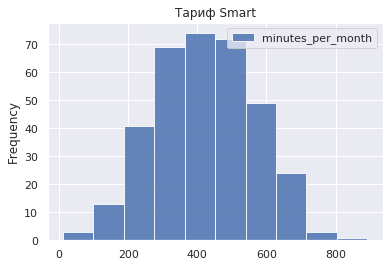

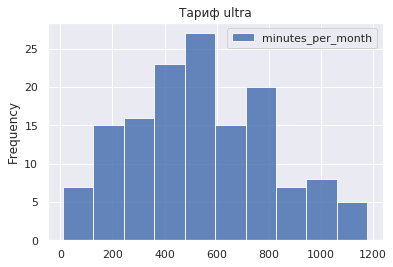

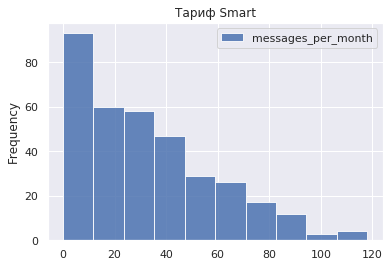

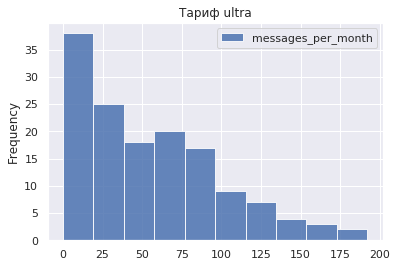

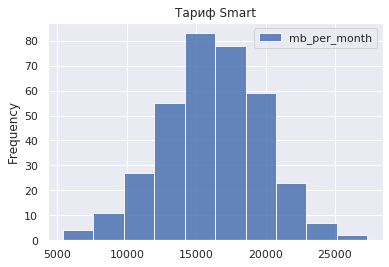

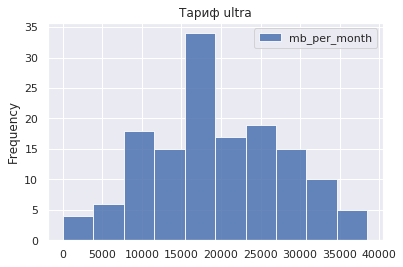

In [37]:
for name in indicators_list:
    draw_hist(statistics_per_user.query('tariff == "smart"'), name, 'Тариф Smart')
    plt.show()
    draw_hist(statistics_per_user.query('tariff == "ultra"'), name, 'Тариф ultra')
    plt.show()

Абоненты тарифа __ultra__ не выходят за лимиты по показателям минут и сообщений, однако забирают интернет сверх лимита.


Пользователям __smart__ интернета явно не хватает. Очень часто они используют интернет сверх лимита. Так же превышают лимит по показателям звонков и СМС.

In [38]:
# функция отрисовки диаграммы размаха
    # data - датафрейм
    # what_to_do - параметр для среза ('query' - используется срез, 'smth else' - не используется)
        
def draw_boxplot(data, what_to_do):
    
    tariff = ['smart', 'ultra']
    
    for name in indicators_list:
        
        for tname in tariff:
            plt.figure(figsize=(15, 2))
            if name == 'minutes_per_month':
                title = ('Минуты')
            elif name == 'messages_per_month':
                title = ('Сообщения')
            else:
                title = ('Мегабайты')
            print('Тариф', tname, ':', title)
            
            if what_to_do == 'query':
                sns.boxplot(
                    data=data.query('tariff == @tname'), x=name, 
                    orient="h", width=0.3, palette='deep')
            else:
                sns.boxplot(data=data.loc[[tname]][name], orient="h", width=0.3, palette='deep')
                
            plt.show()

Строим диаграмму размаха

Тариф smart : Минуты


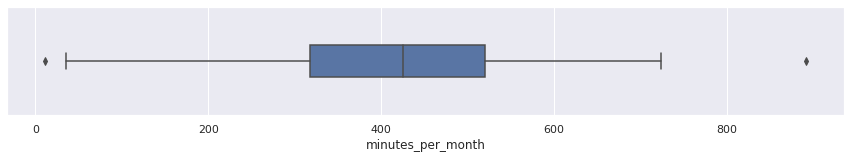

Тариф ultra : Минуты


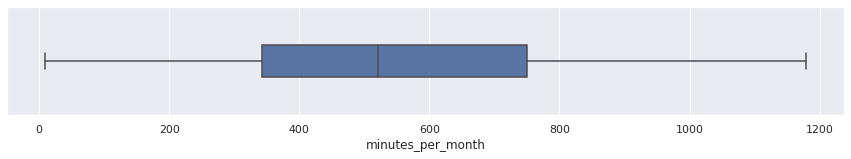

Тариф smart : Сообщения


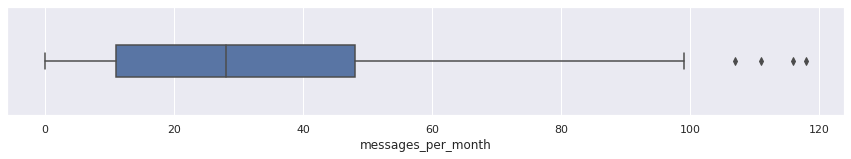

Тариф ultra : Сообщения


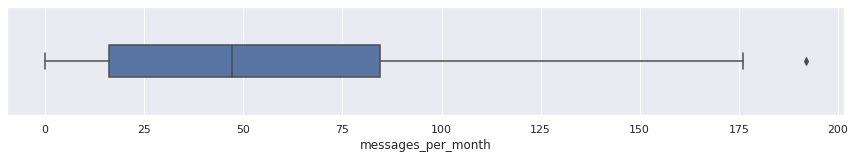

Тариф smart : Мегабайты


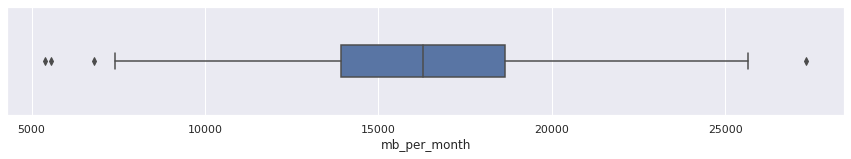

Тариф ultra : Мегабайты


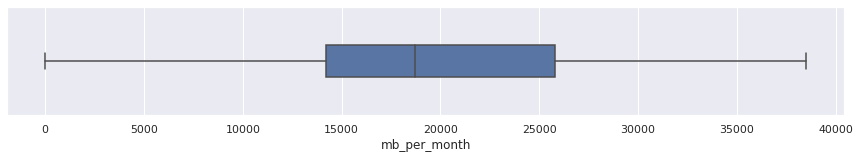

In [39]:
draw_boxplot(statistics_per_user, 'query')

Датасеты симметричны, распределения нормальные

#### Дисперсия

Найдем дисперсию

In [40]:
variance_by_tariff = (
    statistics_per_user.pivot_table(index='tariff',
                                  values=['minutes_per_month',
                                          'messages_per_month',
                                          'mb_per_month'], 
                                  aggfunc='var')
        [['minutes_per_month',
          'messages_per_month',
          'mb_per_month']]
)

variance_by_tariff.columns = ['minutes_var', 'messages_var', 'mb_var']

variance_by_tariff

,minutes_var,messages_var,mb_var
tariff,,,
smart,20587.160455,704.483613,1.287280e+07
ultra,72046.784814,2092.365337,6.964014e+07


#### Стандартное отклонение

Найдем стандартное отклонение

In [41]:
std_by_tariff = (
    statistics_per_user.pivot_table(index='tariff',
                                  values=['minutes_per_month',
                                          'messages_per_month',
                                          'mb_per_month'], 
                                  aggfunc='std')
        [['minutes_per_month',
          'messages_per_month',
          'mb_per_month']]
)

std_by_tariff.columns = ['minutes_std', 'messages_std', 'mb_std']

std_by_tariff

,minutes_std,messages_std,mb_std
tariff,,,
smart,143.482265,26.54211,3587.868204
ultra,268.415321,45.74238,8345.067062


#### Подсчет минут разговора, количества сообщений и объёма интернет-трафика, который требуется пользователям каждого тарифа

In [42]:
def find_limits(data, tariff):
    print('Пользователям тарифа {} требуется:'.format(tariff))
    
    for name in indicators_list:
        if name == 'minutes_per_month':

            higher_limit = (
                (data[data['tariff'] == tariff][name].mean() + 3 * std_by_tariff.loc[tariff, 'minutes_std'])
                .astype('int')
            )
            print('  -  минут: до {}'.format(higher_limit))
          
        elif name == 'messages_per_month':
            
            higher_limit = (
                (data[data['tariff'] == tariff][name].mean() + 3 * std_by_tariff.loc[tariff, 'messages_std'])
                .astype('int')
            )
            print('  -  сообщений: до {}'.format(higher_limit))
          
        else:
            
            higher_limit = (
                (data[data['tariff'] == tariff][name].mean() + 3 * std_by_tariff.loc[tariff, 'mb_std'])
                .astype('int')
            )
            print('  -  мегабайт: до {}'.format(higher_limit))
            
    print()

In [43]:
find_limits(statistics_per_user, 'smart')
find_limits(statistics_per_user, 'ultra')

Пользователям тарифа smart требуется:
  -  минут: до 851
  -  сообщений: до 111
  -  мегабайт: до 26968

Пользователям тарифа ultra требуется:
  -  минут: до 1351
  -  сообщений: до 191
  -  мегабайт: до 44559



## Рассмотрим средние данные за каждый из 12ти месяцев

Формируем таблицу с общим значением минут, сообщений и мегабайт для всех пользователей по месяцам и тарифам.

In [44]:
amount_per_month = (
    statistics_merged.pivot_table(index=['tariff', 'month'],
                                  values=['minutes_per_month',
                                          'messages_per_month',
                                          'mb_per_month'], 
                                  aggfunc='sum')
    [['minutes_per_month',
      'messages_per_month',
      'mb_per_month']]                                            # устанавливаем порядок отображения колонок
)

In [45]:
amount_per_month

minutes_per_month  messages_per_month  mb_per_month
tariff month                                                     
smart  1                   6931                 620        289972
       2                  17324                1397        673806
       3                  30034                2453       1165103
       4                  41119                3443       1510441
       5                  54618                4762       2232418
       6                  64885                5430       2582419
       7                  82079                6784       3170051
       8                  99045                7888       3899378
       9                 111439                8714       4229234
       10                125284                9906       4915736
       11                137544               10748       5331078
       12                161275               12095       6097794
ultra  1                   3853                 304        118392
       2                   7131                 527        282920
       3                  18117                1195        649480
       4                  25191                1727        923032
       5                  34192                2423       1260496
       6                  40295                3244       1533154
       7                  49667                4266       1801175
       8                  54653                4930       2020013
       9                  62036                5751       2121665
       10                 68644                6899       2371164
       11                 72545                7224       2536239
       12                 82400                8141       2909982

Изучим распределение для каждого параметра обоих тарифов (минуты, сообщения, мегабайты):

Тариф smart : Минуты


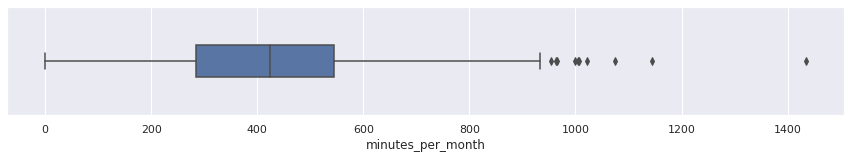

Тариф ultra : Минуты


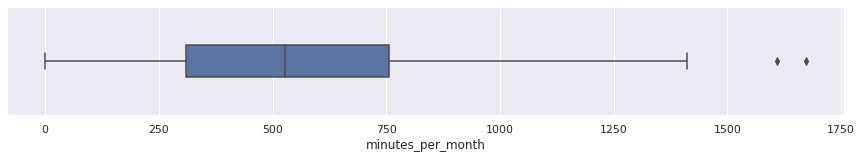

Тариф smart : Сообщения


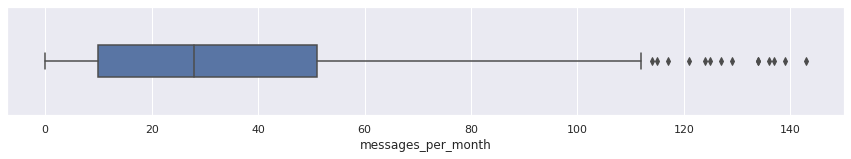

Тариф ultra : Сообщения


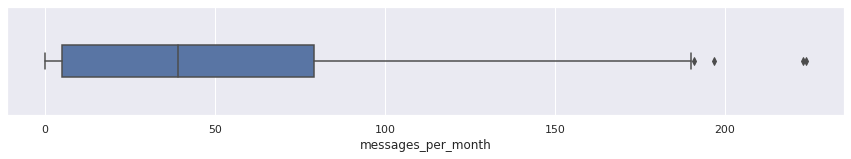

Тариф smart : Мегабайты


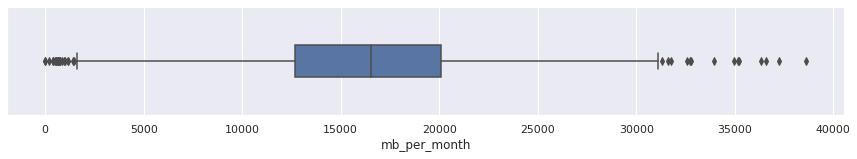

Тариф ultra : Мегабайты


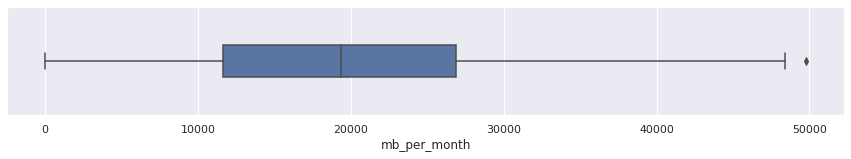

In [46]:
draw_boxplot(statistics_merged, 'query')

Распределения симметричные, нормальные. Следовательно к ним применимо правило трех сигм.

### Среднее, дисперсия, стандартное отклонение

##### Среднее

Формируем таблицу со средним значением минут, сообщений и мегабайт для всех пользователей по месяцам и тарифам.

In [47]:
mean_by_month = (
    (statistics_merged.pivot_table(index=['tariff', 'month'],
                                  values=['minutes_per_month',
                                          'messages_per_month',
                                          'mb_per_month'], 
                                  aggfunc='mean')
    [['minutes_per_month',
      'messages_per_month',
      'mb_per_month']])                                            # устанавливаем порядок отображения колонок
     .round(2)                                                     # округляем до 2 знаков
)

In [48]:
mean_by_month

minutes_per_month  messages_per_month  mb_per_month
tariff month                                                     
smart  1                 203.85               18.24       8528.59
       2                 298.69               24.09      11617.34
       3                 390.05               31.86      15131.21
       4                 367.13               30.74      13486.08
       5                 387.36               33.77      15832.75
       6                 398.07               33.31      15843.06
       7                 408.35               33.75      15771.40
       8                 423.27               33.71      16664.01
       9                 430.27               33.64      16329.09
       10                427.59               33.81      16777.26
       11                436.65               34.12      16924.06
       12                479.99               36.00      18148.20
ultra  1                 428.11               33.78      13154.67
       2                 297.12               21.96      11788.33
       3                 489.65               32.30      17553.51
       4                 475.30               32.58      17415.70
       5                 534.25               37.86      19695.25
       6                 497.47               40.05      18927.83
       7                 564.40               48.48      20467.90
       8                 530.61               47.86      19611.78
       9                 558.88               51.81      19114.10
       10                581.73               58.47      20094.61
       11                562.36               56.00      19660.77
       12                614.93               60.75      21716.28

Построим гистограммы среднего для двух тарифов:

Тариф smart : Минуты


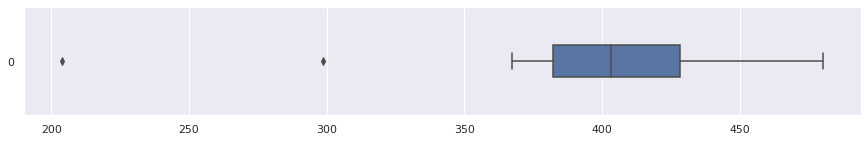

Тариф ultra : Минуты


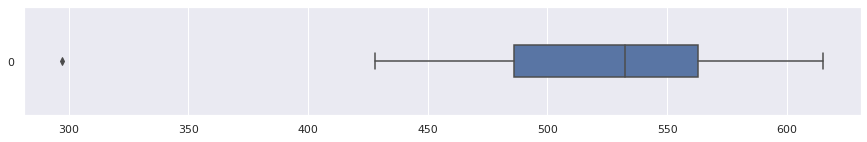

Тариф smart : Сообщения


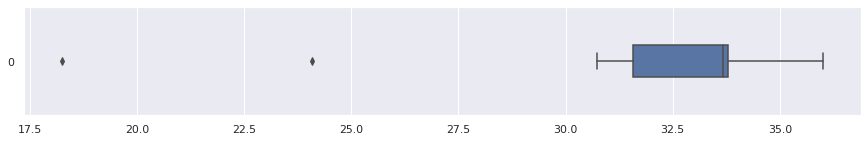

Тариф ultra : Сообщения


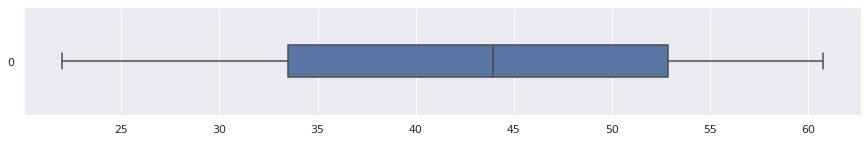

Тариф smart : Мегабайты


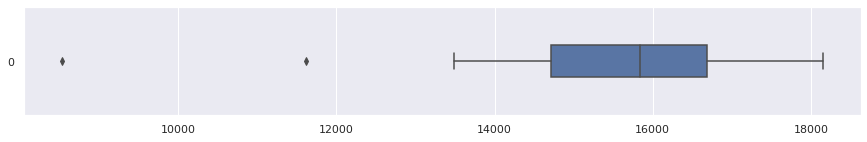

Тариф ultra : Мегабайты


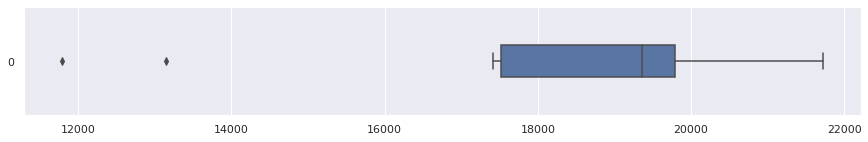

In [49]:
draw_boxplot(mean_by_month, 'else')

##### Дисперсия

Найдем дисперсию для каждого тарифа по месяцам

In [50]:
variance_by_month = (
    statistics_merged.pivot_table(index=['tariff','month'],
                                  values=['minutes_per_month',
                                          'messages_per_month',
                                          'mb_per_month'], 
                                  aggfunc='var')
    [['minutes_per_month',
      'messages_per_month',
      'mb_per_month']]                                            # устанавливаем порядок отображения колонок
     .round(2)
)

In [51]:
variance_by_month

minutes_per_month  messages_per_month  mb_per_month
tariff month                                                     
smart  1               23787.34              262.37  4.166090e+07
       2               36412.29              473.10  3.915169e+07
       3               36823.16              718.49  3.407278e+07
       4               34778.21              602.14  3.257102e+07
       5               34820.06              730.99  3.585187e+07
       6               29960.52              810.46  3.377733e+07
       7               32250.27              799.89  3.488735e+07
       8               34177.27              840.66  3.138540e+07
       9               32950.53              793.67  2.718073e+07
       10              34889.53              818.35  3.453379e+07
       11              31100.61              807.87  2.870055e+07
       12              39131.45              937.74  3.125639e+07
ultra  1               72769.36              940.69  4.722308e+07
       2               87919.68              716.82  1.135342e+08
       3              111384.90             1732.38  1.201890e+08
       4               66036.83             1431.40  8.910445e+07
       5               74881.02             1694.82  1.033840e+08
       6               86019.65             1737.40  8.783160e+07
       7               86952.59             2143.22  1.041858e+08
       8               91169.55             2068.82  1.118461e+08
       9               98597.90             2041.86  9.148474e+07
       10              97140.34             2632.10  9.849259e+07
       11              88449.62             2423.20  9.923957e+07
       12             107981.03             2608.26  1.080672e+08

Построим гистограммы:

Тариф smart : Минуты


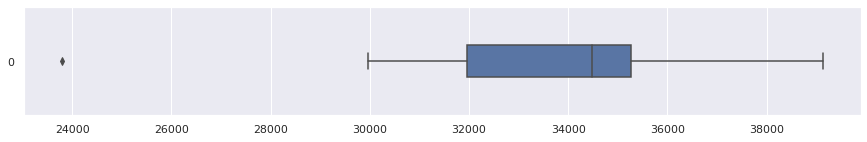

Тариф ultra : Минуты


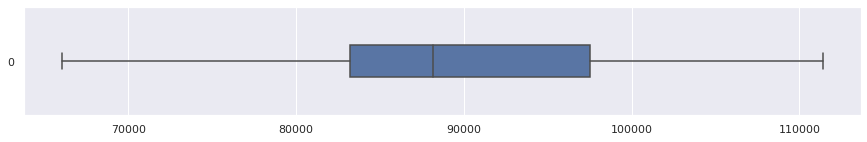

Тариф smart : Сообщения


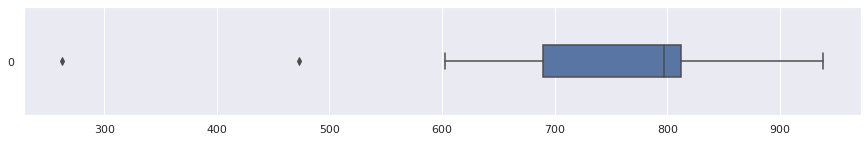

Тариф ultra : Сообщения


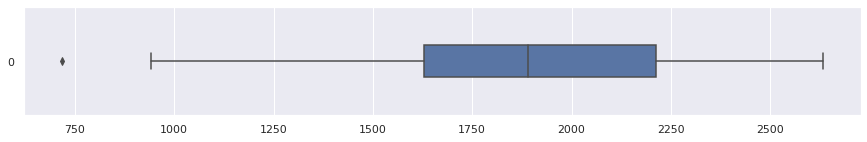

Тариф smart : Мегабайты


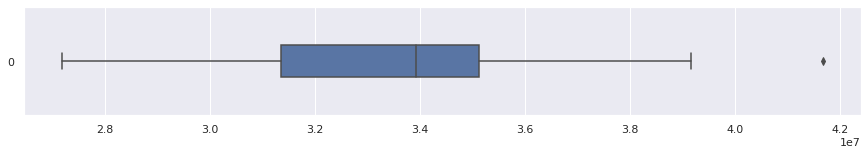

Тариф ultra : Мегабайты


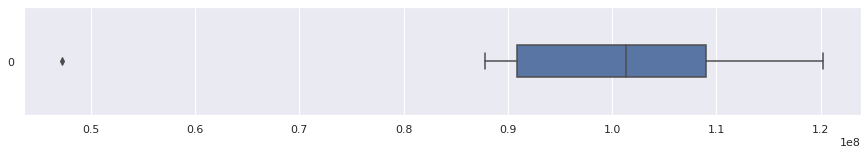

In [52]:
draw_boxplot(variance_by_month, 'no')

##### Стандартное отклонение

Найдем стандартное отклонение для каждого тарифа по месяцам

In [53]:
std_by_month = (
    statistics_merged.pivot_table(index=['tariff','month'],
                                  values=['minutes_per_month',
                                          'messages_per_month',
                                          'mb_per_month'], 
                                  aggfunc='std')
    [['minutes_per_month',
      'messages_per_month',
      'mb_per_month']]                                            # устанавливаем порядок отображения колонок
     .round(2)
)

In [54]:
std_by_month

minutes_per_month  messages_per_month  mb_per_month
tariff month                                                     
smart  1                 154.23               16.20       6454.53
       2                 190.82               21.75       6257.13
       3                 191.89               26.80       5837.19
       4                 186.49               24.54       5707.10
       5                 186.60               27.04       5987.64
       6                 173.09               28.47       5811.83
       7                 179.58               28.28       5906.55
       8                 184.87               28.99       5602.27
       9                 181.52               28.17       5213.51
       10                186.79               28.61       5876.55
       11                176.35               28.42       5357.29
       12                197.82               30.62       5590.74
ultra  1                 269.76               30.67       6871.91
       2                 296.51               26.77      10655.24
       3                 333.74               41.62      10963.07
       4                 256.98               37.83       9439.52
       5                 273.64               41.17      10167.79
       6                 293.29               41.68       9371.85
       7                 294.88               46.29      10207.14
       8                 301.94               45.48      10575.73
       9                 314.00               45.19       9564.77
       10                311.67               51.30       9924.34
       11                297.40               49.23       9961.91
       12                328.60               51.07      10395.54

Тариф smart : Минуты


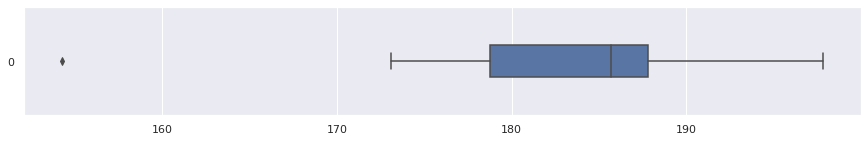

Тариф ultra : Минуты


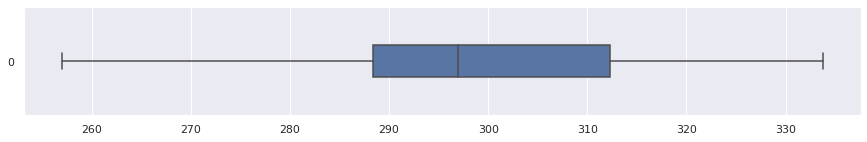

Тариф smart : Сообщения


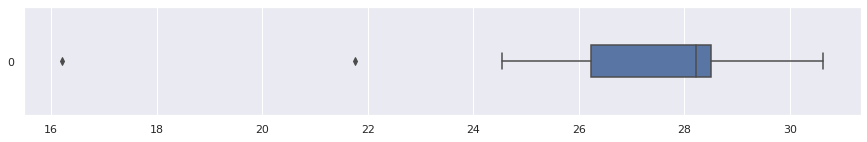

Тариф ultra : Сообщения


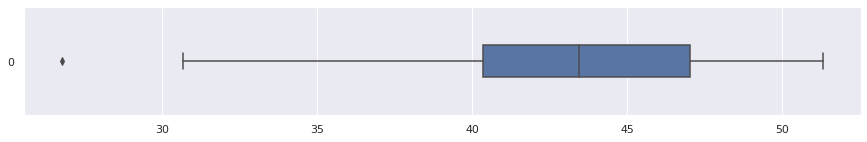

Тариф smart : Мегабайты


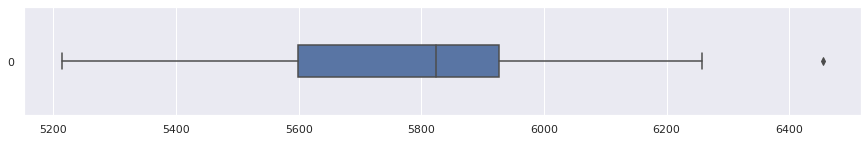

Тариф ultra : Мегабайты


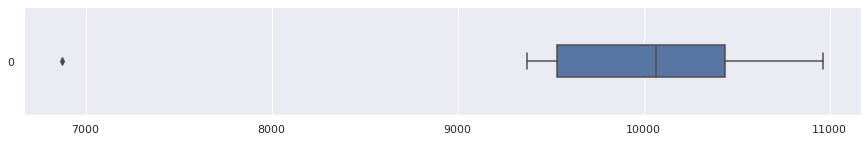

In [55]:
draw_boxplot(std_by_month, 'no')

#### Подсчет минут разговора, количества сообщений и объёма интернет-трафика требуется пользователям каждого тарифа по месяцам

Считаем потребность в услугах для пользователей каждого тарифа в месяц.

In [56]:
need_in_services = mean_by_month + (3 * std_by_month) 

In [57]:
need_in_services

minutes_per_month  messages_per_month  mb_per_month
tariff month                                                     
smart  1                 666.54               66.84      27892.18
       2                 871.15               89.34      30388.73
       3                 965.72              112.26      32642.78
       4                 926.60              104.36      30607.38
       5                 947.16              114.89      33795.67
       6                 917.34              118.72      33278.55
       7                 947.09              118.59      33491.05
       8                 977.88              120.68      33470.82
       9                 974.83              118.15      31969.62
       10                987.96              119.64      34406.91
       11                965.70              119.38      32995.93
       12               1073.45              127.86      34920.42
ultra  1                1237.39              125.79      33770.40
       2                1186.65              102.27      43754.05
       3                1490.87              157.16      50442.72
       4                1246.24              146.07      45734.26
       5                1355.17              161.37      50198.62
       6                1377.34              165.09      47043.38
       7                1449.04              187.35      51089.32
       8                1436.43              184.30      51338.97
       9                1500.88              187.38      47808.41
       10               1516.74              212.37      49867.63
       11               1454.56              203.69      49546.50
       12               1600.73              213.96      52902.90

In [58]:
def draw_plot(data):
    draw_plot_list = ['minutes_per_month', 'messages_per_month', 'mb_per_month']
        
    for name in draw_plot_list:
        if name == 'minutes_per_month':
                title = ('Минуты')
        elif name == 'messages_per_month':
                title = ('Сообщения')
        else:
                title = ('Мегабайты')
        
        data.loc[['smart']][name].plot(kind='line', title=title, legend=True)
        data.loc[['ultra']][name].plot(kind='line', legend=True)
        plt.show()

In [59]:
tarifflist = ['smart', 'ultra']
for name in tarifflist:
    print('Среднее количество минут в месяц, удовлетворяющее потребность большинства пользователей тарифа {}:'.format(name),
          need_in_services.loc[[name]]['minutes_per_month'].mean().round(2))
    print('Среднее количество сообщений в месяц, удовлетворяющее потребность большинства пользователей тарифа {}:'.format(name),
          need_in_services.loc[[name]]['messages_per_month'].mean().round(2))
    print('Среднее количество мегабайт в месяц, удовлетворяющее потребность большинства пользователей тарифа {}:'.format(name),
          need_in_services.loc[[name]]['mb_per_month'].mean().round(2))
    print()

Среднее количество минут в месяц, удовлетворяющее потребность большинства пользователей тарифа smart: 935.12
Среднее количество сообщений в месяц, удовлетворяющее потребность большинства пользователей тарифа smart: 110.89
Среднее количество мегабайт в месяц, удовлетворяющее потребность большинства пользователей тарифа smart: 32488.34

Среднее количество минут в месяц, удовлетворяющее потребность большинства пользователей тарифа ultra: 1404.34
Среднее количество сообщений в месяц, удовлетворяющее потребность большинства пользователей тарифа ultra: 170.57
Среднее количество мегабайт в месяц, удовлетворяющее потребность большинства пользователей тарифа ultra: 47791.43



#### Выводы

Полученные данные количества минут, сообщений и мегабайт для обоих тарифов симметричны относительно среднего, распределение нормальное. Были найдены предельные значения этих показателей, которые удовлетворят большинство пользователей.

Как видно из графиков ниже, всплески потребления приходятся на март, июль и декабрь. Возможно, это связано с праздниками и сезоном отпусков. Либо к концу года в сеть пришли новые абоненты, которые выбрали ее за предоставляемые пакеты услуг и пользуются ими в полной мере.

Распределение количества услуг по месяцам для пользователей обоих тарифов.

- smart - синий
- ultra - оранжевый

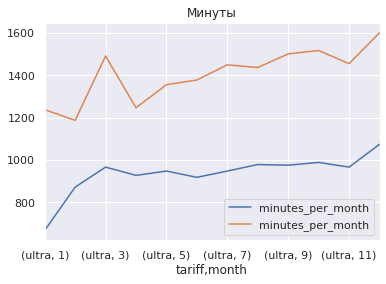

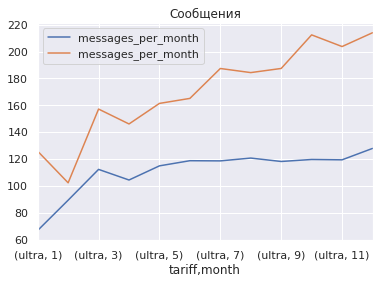

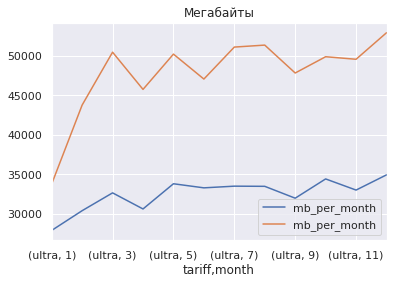

In [60]:
draw_plot(need_in_services)

Гистограммы по каждому параметры для двух тарифов:

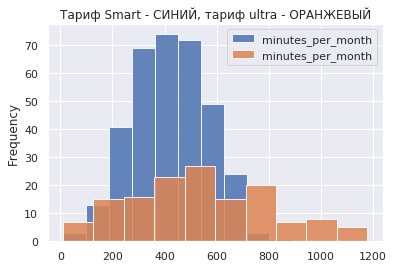

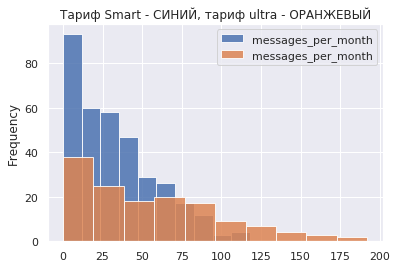

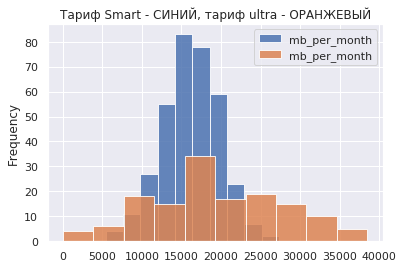

In [62]:
for name in indicators_list:
    draw_hist(statistics_per_user.query('tariff == "smart"'), name, 'Тариф Smart')
    draw_hist(statistics_per_user.query('tariff == "ultra"'), name, 'Тариф Smart - СИНИЙ, тариф ultra - ОРАНЖЕВЫЙ')
    plt.show()

Абоненты тарифа __ultra__ не выходят за лимиты по показателям минут и сообщений, однако забирают интернет сверх лимита.


Пользователям __smart__ интернета явно не хватает. Очень часто они используют интернет сверх лимита. Также превышают лимит по показателям звонков и СМС.

Среднее количество услуг в месяц, удовлетворяющее потребность большинства пользователей по тарифам:


Пользователям тарифа smart требуется:
  -  минут: до 851
  -  сообщений: до 111
  -  мегабайт: до 26968
  
  Пользователям тарифа smart следует предложить тариф с увеличенным лимитом по услугам.

Пользователям тарифа ultra требуется:
  -  минут: до 1351
  -  сообщений: до 191
  -  мегабайт: до 44559

## 4. Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Формулируем __нулевую гипотезу Н0__ исходя из того, что средняя выручка от абонентов двух тарифов равна.

Тогда __альтернативная гипотеза Н1__ - средняя выручка пользователей различается.

Сформируем срезы по тарифам

In [63]:
smart_income = statistics_per_user[statistics_per_user['tariff'] == 'smart']['total_income']
ultra_income = statistics_per_user[statistics_per_user['tariff'] == 'ultra']['total_income']

Найдем среднюю выручку по тарифам:

In [64]:
print('Средняя выручка для тарифа smart:', np.mean(smart_income))
print('Средняя выручка для тарифа ultra:', np.mean(ultra_income))

Средняя выручка для тарифа smart: 686.3323782234957
Средняя выручка для тарифа ultra: 1959.1048951048951


Проверим нулевую гипотезу с помощью т-теста:

Имеем выборки из двух генеральных совокупностей (разные тарифы), поэтому используем метод __scipy.stats.ttest_ind()__.

In [65]:
alpha = .05 

results = scipy.stats.ttest_ind(smart_income,
                         ultra_income,
                         equal_var=False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем гипотезу Н0 о равенстве значений: разница между средней прибылью от пользователей двух тарифов различается')
else:
    print('Отвергнуть гипотезу не получилось: значения не имеют значимых различий')

p-значение:  9.858097649737143e-203
Отвергаем гипотезу Н0 о равенстве значений: разница между средней прибылью от пользователей двух тарифов различается


Разница между средней прибылью от пользователей двух тарифов различается

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Формируем срезы по городам:

In [66]:
moscow_income = statistics_per_user[statistics_per_user['city'] == 'Москва']['total_income']
other_income = statistics_per_user[statistics_per_user['city'] != 'Москва']['total_income']

In [67]:
print('Средняя выручка для Москвы:', np.mean(moscow_income))
print('Средняя выручка для всех остальных городов:', np.mean(other_income))

Средняя выручка для Москвы: 1087.141414141414
Средняя выручка для всех остальных городов: 1048.4860050890586


Формулируем нулевую гипотезу Н0 исходя из того, что средняя выручка от абонентов Москвы и остальных городов равна.

Тогда альтернативная гипотеза Н1 - средняя выручка различается.

В данном случае выборки также являются выборками из двух генеральных совокупностей - Москва / другие города, - поэтому используем метод __scipy.stats.ttest_ind()__.

In [68]:
alpha = .05 

results = scipy.stats.ttest_ind(moscow_income,
                                other_income,
                                equal_var=False)

print('p-значение: ', results.pvalue) 

if (results.pvalue < alpha):
    print('Отвергаем гипотезу Н0 о равенстве значений: разница между средней прибылью от пользователей Москвы и других городов различается')
else:
    print('Отвергнуть гипотезу не получилось: значения не имеют значимых различий')

p-значение:  0.6040788848710932
Отвергнуть гипотезу не получилось: значения не имеют значимых различий


### Выводы

Было проверено 2 утверждения:
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
    - сформулированы гипотезы: __нулевая__ - средняя выручка от абонентов двух тарифов равна; __альтернативная__ - средняя выручка пользователей различается.
    
  Был проведет Т-тест, методом __scipy.stats.ttest_ind()__ для выборок из двух генеральных совокупностей (тариф smart и тариф ultra). В ходе теста нулевая гипотеза была отвергнута. ___Выручка от абонентов двух разных тарифов различается___.
    
    
- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
  - сформулированы гипотезы: __нулевая__ - средняя выручка от абонентов Москвы и остальных городов равна; __альтернативная__ - средняя выручка различается
  
  Рассматриваемые выборки - выборки двух генеральных совокупностей (Москва / остальные города), использован метод __scipy.stats.ttest_ind()__. Тест не позволил отвергнуть нулевую гипотезу, следовательно, выручка пользователей из Москвы значимо не  отличается от выручки пользователей из других регионов     

# Общие выводы

Данные предоставлены полные, без пропусков, кроме набора данных с информацией о пользователях. Была проведена замена типов данных в отдельных столбцах методами __.astype()__ и __.to_datetime()__.

Были обнаружены значения 0 в столбце duration набора данных calls. Скорее всего, это несостоявшиеся разговоры. Были проверены данные по длительности разговора меньше 0.5 минут и больше 0. Такие данные представлены без ошибок. Также для отдельно взятого абонента было проверено наличие звонков с положительной продолжительностью и нулевой. Для такого абонента существуют записи и с нулевой и положительной длительностью разговора. Отсюда можно сделать вывод, что наличие нулей не является ошибкой выгрузки данных, но показывает несостоявшиеся исходящие - собеседник не взял трубку, было занято и т.п.

Нулевые значения столбца mb_used датасета internet заменили значением 1. В соответствии с условиями тарифов, любая интернет-сессия округляется в большую сторону. То, что имеется запись о сессии, количество переданных данных в которой равно 0, скорее всего говорит, что сессия была, но данных было передано очень мало. Условия тарификации предполагают округление в большую сторону до мегабайта, поэтому заменили 0 на 1 методом .replace().

Полученные данные по количеству минут в наборе звонков и потраченных мегабайт в наборе интернета были представлены в виде десятичных дробей (тип данных float). В предыдущем разделе была проведена замена типа данных на целочисленный (integer). Перед этим данные были округлены в большую сторону до мегабайта методом .ceil() библиотеки numpy.

Датасет users содержит пропущенные данные в столбце churn_date - абоненты с пропусками еще имеют действующий договор с оператором, произвели замену на 31.12.2018 для последующих расчетов.

Произведен рассчет по всему датасету среднего месячного количества звонков за год, дисперсии и стандартного отклонения.


Абоненты тарифа __ultra__ не выходят за лимиты по показателям минут и сообщений, однако забирают интернет сверх лимита.


Пользователям __smart__ интернета явно не хватает. Очень часто они используют интернет сверх лимита. Также превышают лимит по показателям звонков и СМС.

Среднее количество услуг в месяц, удовлетворяющее потребность большинства пользователей по тарифам:


Пользователям тарифа smart требуется:
  -  минут: до 851
  -  сообщений: до 111
  -  мегабайт: до 26968
  
  Пользователям тарифа smart следует предложить тариф с увеличенным лимитом по услугам.

Пользователям тарифа ultra требуется:
  -  минут: до 1351
  -  сообщений: до 191
  -  мегабайт: до 44559

Всплески потребления приходятся на март, июль и декабрь. Возможно, это связано с праздниками и сезоном отпусков. Либо к концу года в сеть пришли новые абоненты, которые выбрали ее за предоставляемые пакеты услуг и пользуются ими в полной мере.

Было проверено 2 утверждения:
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
    - сформулированы гипотезы: __нулевая__ - средняя выручка от абонентов двух тарифов равна; __альтернативная__ - средняя выручка пользователей различается.
    
  Был проведет Т-тест, методом __scipy.stats.ttest_ind()__ для выборок из двух генеральных совокупностей (тариф smart и тариф ultra). В ходе теста нулевая гипотеза была отвергнута. ___Выручка от абонентов двух разных тарифов различается___.
    
    
- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
  - сформулированы гипотезы: __нулевая__ - средняя выручка от абонентов Москвы и остальных городов равна; __альтернативная__ - средняя выручка различается
  
  Рассматриваемые выборки - выборки двух генеральных совокупностей (Москва / остальные города), использован метод __scipy.stats.ttest_ind()__. Тест не позволил отвергнуть нулевую гипотезу, следовательно, __выручка пользоватеей из Москвы значимо не отличается от выручки пользователей из других регионов__  